## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use Matplotlib to create your plots.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Coding Boot Camp (C) 2017. All Rights Reserved.


In [3]:
# Dependencies
from random import *
import urllib
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as ow
import pandas as pd
from config import *
from citipy import citipy

In [19]:
#select random latitude (from -90 to +90)

city_list = pd.DataFrame()

for i in range(600):
    lat=(random()-.5)*randint(-180,180)
    lon=(random()-.5)*randint(-360,360)
    coords=pd.DataFrame([[lat,lon]], columns=['lat','lon'])
    city_list=city_list.append(coords)
    
    
city_list=city_list.reset_index()
city_list=city_list[['lat','lon']]

In [25]:
%%capture

#Use Citipy to find the nearest city to each pair of latlongs

for row in range(0,len(city_list)):
    #print(city_list.loc[row]['lat'])
    lat = city_list.loc[row]['lat']
    lon = city_list.loc[row]['lon']    
    city = citipy.nearest_city(lat,lon)
    city_list.set_value(row, "city", city.city_name.title())
    city_list.set_value(row, "country", city.country_code.upper())

In [26]:
#Make sure the dataframe looks reasonable
city_list.head(5)
city_list.tail(5)

,lat,lon,actual_lat,actual_lon,city,country
0,-7.403356,-6.627921,43.5024,-4.91692,Georgetown,SH
1,32.935846,-44.954723,43.5024,-4.91692,Torbay,CA
2,0.381295,94.969960,43.5024,-4.91692,Meulaboh,ID
3,-57.648269,92.845761,43.5024,-4.91692,Busselton,AU
4,3.779435,9.500697,43.5024,-4.91692,Tiko,CM


,lat,lon,actual_lat,actual_lon,city,country
595,-14.434289,25.355745,43.5024,-4.91692,Kaoma,ZM
596,52.246393,-15.174460,43.5024,-4.91692,Dingle,IE
597,56.180804,27.062354,43.5024,-4.91692,Kraslava,LV
598,62.814909,12.771654,43.5024,-4.91692,Roros,NO
599,43.502384,-106.638396,43.5024,-4.91692,Casper,US


In [27]:
%%capture

#add actual lat-longs to the dataframe - these are what we will use to get weather data

base_url = "https://maps.googleapis.com/maps/api/geocode/json"

city_list['actual_lat']=''
city_list['actual_lon']=''

city_list

for row in range(0,len(city_list)):
    
    try:    
        print(row)
        city=city_list.loc[row]['city']
        country=city_list.loc[row]['country']
        address=str(city+'+'+country)

        params = {
                "address": address,
                "key": gkey
            }

        response = requests.get(base_url, params=params)
        print(response.url)

        geo_data = response.json()
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

    except IndexError:
        print("No data available - skipping...")

    city_list.set_value(row, "actual_lat", lat)
    city_list.set_value(row, "actual_lon", lng)
    

In [35]:
#check the dataframe again
city_list.head(5)
city_list.tail(5)

,lat,lon,actual_lat,actual_lon,city,country
0,-7.403356,-6.627921,-7.92622,-14.4112,Georgetown,SH
1,32.935846,-44.954723,47.6581,-52.7355,Torbay,CA
2,0.381295,94.969960,4.1437,96.1281,Meulaboh,ID
3,-57.648269,92.845761,-33.6555,115.35,Busselton,AU
4,3.779435,9.500697,4.07863,9.35898,Tiko,CM


,lat,lon,actual_lat,actual_lon,city,country
595,-14.434289,25.355745,-14.8119,24.7974,Kaoma,ZM
596,52.246393,-15.174460,52.1409,-10.264,Dingle,IE
597,56.180804,27.062354,55.8948,27.1628,Kraslava,LV
598,62.814909,12.771654,62.5748,11.3841,Roros,NO
599,43.502384,-106.638396,42.8666,-106.313,Casper,US


In [36]:
%%capture

#NEXT STEP: write all this weather data to a dataframe 

#print weather summary for all cities in the list

base_url = 'http://api.openweathermap.org/data/2.5/weather?'

city_list['temp']=''
city_list['clouds']=''
city_list['humidity']=''
city_list['wind_speed']=''

#for cities that have no data, add the row index to a list. Then we will drop all of them afterwards.
rows_to_drop = []

for row in range(0, len(city_list)):
    
    try:
        lat = city_list.loc[row]['actual_lat']
        lon = city_list.loc[row]['actual_lon']
        query_url = base_url + 'units=imperial&lat='+str(lat) + '&lon='+ str(lon) +'&appid=' + weather_key
        response = requests.get(query_url)
        result=response.json()

        city=city_list.loc[row]['city']
        temp=float(result['main']['temp'])
        clouds=result['clouds']['all']
        humidity=result['main']['humidity']
        wind_speed=result['wind']['speed']

        #I HAVE THE OUTPUT SUPPRESSED FOR THIS CELL because I have a config setting that makes all the set_value things produce output, which is crappy
        #but here is how one WOULD print a log:

        print(f"Processing data for City # {row}: {city}")
        print(response.url)    

        #add values to the dataframe
        city_list.set_value(row, "temp", temp)
        city_list.set_value(row, "clouds", clouds)    
        city_list.set_value(row, "humidity", humidity)
        city_list.set_value(row, "wind_speed", wind_speed) 
    except KeyError:
        #print(f"Processing data for City # {row}: {city}")
        #print(response.url)    
        #add values to the dataframe
        rows_to_drop.append(row)
        #print("No data available. Skipping...")



#drop these rows from the dataframe so that you can perform operations on the weather fields

city_list.drop(city_list.index[rows_to_drop])

In [37]:
city_list.head()
city_list.tail()

,lat,lon,actual_lat,actual_lon,city,country,temp,clouds,humidity,wind_speed
0,-7.403356,-6.627921,-7.92622,-14.4112,Georgetown,SH,75.04,68,100,17.81
1,32.935846,-44.954723,47.6581,-52.7355,Torbay,CA,28.4,20,79,8.05
2,0.381295,94.969960,4.1437,96.1281,Meulaboh,ID,83.1,8,100,2.04
3,-57.648269,92.845761,-33.6555,115.35,Busselton,AU,65.77,0,99,15.9
4,3.779435,9.500697,4.07863,9.35898,Tiko,CM,77,75,100,2.24


,lat,lon,actual_lat,actual_lon,city,country,temp,clouds,humidity,wind_speed
595,-14.434289,25.355745,-14.8119,24.7974,Kaoma,ZM,65.05,76,97,6.02
596,52.246393,-15.174460,52.1409,-10.264,Dingle,IE,53.49,92,97,10.16
597,56.180804,27.062354,55.8948,27.1628,Kraslava,LV,31.44,80,99,8.25
598,62.814909,12.771654,62.5748,11.3841,Roros,NO,12.2,12,100,4.7
599,43.502384,-106.638396,42.8666,-106.313,Casper,US,46.4,1,28,10.29


In [38]:
#WRITE TO CSV
city_list.head()
city_list.to_csv('Output/weather_data_output.csv')

,lat,lon,actual_lat,actual_lon,city,country,temp,clouds,humidity,wind_speed
0,-7.403356,-6.627921,-7.92622,-14.4112,Georgetown,SH,75.04,68,100,17.81
1,32.935846,-44.954723,47.6581,-52.7355,Torbay,CA,28.4,20,79,8.05
2,0.381295,94.969960,4.1437,96.1281,Meulaboh,ID,83.1,8,100,2.04
3,-57.648269,92.845761,-33.6555,115.35,Busselton,AU,65.77,0,99,15.9
4,3.779435,9.500697,4.07863,9.35898,Tiko,CM,77,75,100,2.24


In [63]:
%%capture
#Temperature (F) vs. Latitude
#x_lim = 2 * np.pi #set this later

#X-axis: Latitude
#Y-axis: Temperature
x_axis = city_list['actual_lat']
y_axis = city_list['temp']

x_min=x_axis.min()-10
x_max=x_axis.max()+10

y_min=y_axis.min()-10
y_max=y_axis.max()+10

plt.title("Temperature (F) vs. Latitude\nNovember 13, 2017\n\n")
plt.xlabel("Latitude\n")
plt.ylabel("\nTemp (degrees F)")

#plt.hlines(0,0, x_lim, alpha=0.2) #Idk what this is lol

plt.scatter(x_axis, y_axis, marker="o", color="red")

#SAVE TO PNG
plt.savefig('Output/Fig1_Temp_Latitude.png')

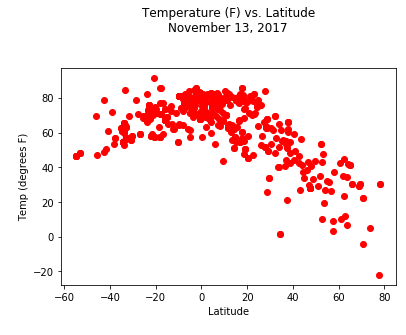

In [64]:
plt.show()

In [65]:
%%capture
##Humidity (%) vs. Latitude

#X-axis: Latitude
#Y-axis: Humidity (%)
x_axis = city_list['actual_lat']
y_axis = city_list['humidity']

x_min=x_axis.min()-10
x_max=x_axis.max()+10

y_min=y_axis.min()-10
y_max=y_axis.max()+10

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.title("Humidity (%) vs. Latitude\nNovember 13, 2017\n\n")
plt.xlabel("\nLatitude")
plt.ylabel("Humidity (%)\n")

plt.scatter(x_axis, y_axis, marker="o", color="red")

#SAVE TO PNG
plt.savefig('Output/Fig2_Humidity_Latitude.png')

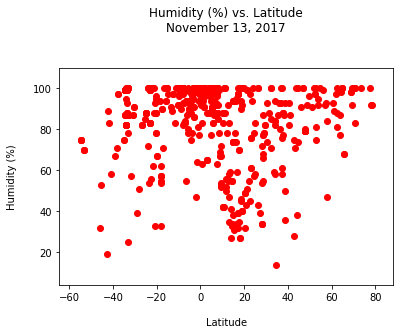

In [66]:
plt.show()

In [67]:
%%capture
#Cloudiness (%) vs. Latitude

#X-axis: Latitude
#Y-axis: Cloudiness (%)
x_axis = city_list['actual_lat']
y_axis = city_list['clouds']

x_min=x_axis.min()-10
x_max=x_axis.max()+10

y_min=y_axis.min()-10
y_max=y_axis.max()+10

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.title("Cloudiness (%) vs. Latitude\nNovember 13, 2017\n\n")
plt.xlabel("\nLatitude")
plt.ylabel("Cloudiness (%)\n")

#plt.hlines(0,0, x_lim, alpha=0.2) #Idk what this is lol

plt.scatter(x_axis, y_axis, marker="o", color="red")

#SAVE TO PNG
plt.savefig('Output/Fig3_Cloudiness_Latitude.png')

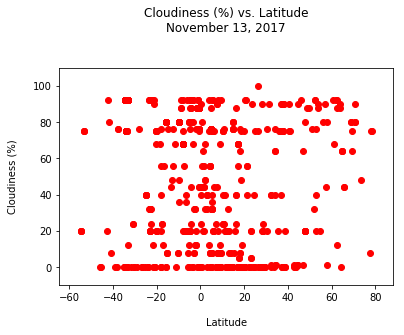

In [68]:
plt.show()

In [74]:
%%capture
#Wind Speed (mph) vs. Latitude

#X-axis: Latitude
#Y-axis: Wind Speed (mph)
x_axis = city_list['actual_lat']
y_axis = city_list['wind_speed']

x_min=x_axis.min()-10
x_max=x_axis.max()+10

y_min=y_axis.min()-10
y_max=y_axis.max()+10

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.title("Wind Speed (mph) vs. Latitude\nNovember 13, 2017\n\n")
plt.xlabel("\nLatitude")
plt.ylabel("Wind Speed (mph)\n")

#plt.hlines(0,0, x_lim, alpha=0.2) #Idk what this is lol

plt.scatter(x_axis, y_axis, marker="o", color="red")

#SAVE TO PNG
plt.savefig('Output/Fig4_WindSpeed_Latitude.png')

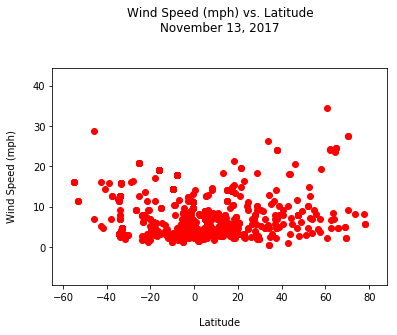

In [75]:
plt.show()

In [ ]:
#TRENDS ON TRENDS

#Observation 1:

#Of the weather variables observed, the one most closely associated with latitude was Temperature, 
#which reaches its maximum close to the equator and generally tends to decrease as the latitude 
#gets farther away from 0 degrees.

#Observation 2:

#Based on the scatter plot, it appears to be the case that latitude is not a strong predictor of cloudiness. However,
#there is also a wide variation of humidities across the globe. This indicates that whatever climatic factors
#drive cloudiness are not driven by either latitude (which shows no relationship) or temperature (which is closely
#related to latitude).

#Observation 3:

#Wind speed shows a curvilinear relationship with latitude in a fashion similar to temperature, though
#with a weaker correlation. This relationship is the opposite of temperature - the farther one gets away from the
#equator, the higher the wind speeds that tend to occur. Depending on whether the temperature figures
#are affected by wind speed, this may indicate part of the causal mechanism by which distance from the equator
#drives colder temperatures. (I'm not sure whether temperature in these data take wind speed into account or not, though.)

In [71]:
#print weather summary for all cities in the list (I wanted to save this code but it's not part of the assignment)

base_url = 'http://api.openweathermap.org/data/2.5/weather?'


for row in range(0, len(city_list)):
    
    try:
        lat = city_list.loc[row]['actual_lat']
        lon = city_list.loc[row]['actual_lon']
        query_url = base_url + 'units=imperial&lat='+str(lat) + '&lon='+ str(lon) +'&appid=' + weather_key
        response = requests.get(query_url)
        url=response.url
        #print(response.url)
        response=response.json()

        city=city_list.loc[row]['city']
        temp=response['main']['temp']
        clouds=response['clouds']['all']
        humidity=response['main']['humidity']
        wind_speed=response['wind']['speed']

        print(f"\n\nWeather summary for {city}")
        print(url)
        print("----------------------------")
        print(f"Temp: {temp}")
        print(f"Clouds: {clouds}")
        print(f"Humidity: {humidity}")
        print(f"Wind Speed: {wind_speed}")
    except KeyError:
        print("No data. Skipping...")




Weather summary for Georgetown
http://api.openweathermap.org/data/2.5/weather?units=imperial&lat=-7.926222999999999&lon=-14.4112011&appid=25bc90a1196e6f153eece0bc0b0fc9eb
----------------------------
Temp: 75.04
Clouds: 68
Humidity: 100
Wind Speed: 17.81


Weather summary for Torbay
http://api.openweathermap.org/data/2.5/weather?units=imperial&lat=47.6580777&lon=-52.7355238&appid=25bc90a1196e6f153eece0bc0b0fc9eb
----------------------------
Temp: 28.4
Clouds: 20
Humidity: 79
Wind Speed: 8.05


Weather summary for Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=imperial&lat=4.1436951&lon=96.12811459999999&appid=25bc90a1196e6f153eece0bc0b0fc9eb
----------------------------
Temp: 83.1
Clouds: 8
Humidity: 100
Wind Speed: 2.04


Weather summary for Busselton
http://api.openweathermap.org/data/2.5/weather?units=imperial&lat=-33.6554927&lon=115.3500188&appid=25bc90a1196e6f153eece0bc0b0fc9eb
----------------------------
Temp: 65.77
Clouds: 0
Humidity: 99
Wind Speed: 15.9


Weat

KeyboardInterrupt: 